In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
import glob

import tensorflow as tf
import keras
from keras import models
from keras import layers
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:

engagement_df = pd.read_csv('./takehome_user_engagement.csv')
print(len(engagement_df))
print(len(engagement_df[engagement_df.visited!=1]))
engagement_df.head(10)

207917
0


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [3]:

#

unique_users = engagement_df['user_id'].unique()
#print(len(unique_users))
data1 = {'user_id':unique_users, 'adopted':False}

adopted_df = pd.DataFrame(data1)
    
print(adopted_df.head(10))
print(adopted_df)



   user_id  adopted
0        1    False
1        2    False
2        3    False
3        4    False
4        5    False
5        6    False
6        7    False
7       10    False
8       11    False
9       13    False
      user_id  adopted
0           1    False
1           2    False
2           3    False
3           4    False
4           5    False
...       ...      ...
8818    11996    False
8819    11997    False
8820    11998    False
8821    11999    False
8822    12000    False

[8823 rows x 2 columns]


In [4]:
adoptedlen = len(adopted_df)
engagementlen = len(engagement_df)
print(adoptedlen)
print(engagementlen)    

user_id0 = 0
user_id1 = engagement_df.loc[0, 'user_id']
user_id2 = engagement_df.loc[1, 'user_id']
user_id3 = engagement_df.loc[2, 'user_id']

user_idx = 0
for i in range(engagementlen-2) :
    if (user_idx > adoptedlen - 1) :
        break
    
    user_id1 = engagement_df.loc[i, 'user_id']
    user_id2 = engagement_df.loc[i+1, 'user_id']
    user_id3 = engagement_df.loc[i+2, 'user_id']
    
    adopted = adopted_df.loc[user_idx, 'adopted']
    #print("888. ", user_idx, user_id, adopted)
    
    if ((user_id1 == user_id2) & (adopted == True) ) :
        user_id0 = user_id1
        continue
    if ((user_id1 != user_id2) & (adopted == True) ) :
        user_id0 = 0
        user_idx = user_idx + 1
        continue
    
    if ( (adopted == False) & (user_id1 != user_id2) ) :           
            user_id0 = 0
            user_idx = user_idx + 1
            continue
                   
         
    date1 = pd.to_datetime(engagement_df['time_stamp'][i])
    time1 = (date1 - pd.Timestamp("1970-01-01")) // pd.Timedelta('86400s')  
    date2 = pd.to_datetime(engagement_df['time_stamp'][i+1])
    time2 = (date2 - pd.Timestamp("1970-01-01")) // pd.Timedelta('86400s')
    date3 = pd.to_datetime(engagement_df['time_stamp'][i+2])
    time3 = (date3 - pd.Timestamp("1970-01-01")) // pd.Timedelta('86400s')

    if ( (user_id1 == user_id2) & (user_id1 == user_id3)  & \
         (time3 - time1 < 7) &  ( adopted == False ) & \
         ( user_id0 != user_id1)):
        adopted_df.at[user_idx, 'adopted'] = True
        adopted_df.at[user_idx, 'user_id'] = user_id1
        user_id0 = user_id1

adopted_df.head(10)
#print(adopted_df)            
#adopted1_df = adopted_df.drop_duplicates(keep='first')   
#print(adopted1_df)        
        
    

8823
207917


,user_id,adopted
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False
5,6,False
6,7,False
7,10,True
8,11,False
9,13,False


In [5]:
relax_df = pd.DataFrame(['object_id', 'creation_time', 'name', 'email', \
                         'creation_source',  'last_session_creation_time', \
                         'opted_in_to_mailing_list', 'enabled_for_marketing_drip', \
                         'org_id', 'invited_by_user_id'])
relax_df = pd.read_csv('./takehome_users.csv', engine='python', \
                       parse_dates=['creation_time'], infer_datetime_format=True)

relax_df['invited_by_user_id'].fillna(0, inplace=True)
relax_df['last_session_creation_time'].fillna(0, inplace=True)
relax_df.last_session_creation_time = \
    relax_df.last_session_creation_time.astype('int64')
relax_df.object_id = relax_df.object_id.astype('int64')
relax_df.org_id = relax_df.org_id.astype('int64')
relax_df.invited_by_user_id = relax_df.invited_by_user_id.astype('int64')

user_len = len(relax_df)
print("user_len = ", user_len)
len_adopted_df = len(adopted_df)
print("len_adopted_df = ", len_adopted_df)

# The user_ids that have not logged at least once do not have records in this file. 
# Therefore, the adopted_df must be modified to insert user_ids that have not logged in at leat once 
# with adopted_field as False
print("---------------")
relax_df['adopted'] = False
print(relax_df)
print("---------------")

k = 0
print("44444", adopted_df.user_id) 
print("555555")    
for i in range(user_len) :
    if i in (adopted_df.user_id) :
        if (adopted_df.loc[k, 'adopted'] == True) :
            relax_df.at[i,'adopted'] = True
            #print("AAA", relax_df.loc[i,'adopted'])
        elif (adopted_df.loc[k, 'adopted'] == False) :
            relax_df.at[i,'adopted'] = False
            #print("BBB", relax_df.loc[i,'adopted'])
        k = k + 1            
    else :
        relax_df.at[i,'adopted'] = False
        #print("CCC", relax_df.loc[i,'adopted'])
print("k = ", k)
print(relax_df.head(10))
print("Columns = ", relax_df.columns)
print("Describe = ", relax_df.describe)

(train, test) = train_test_split(relax_df, test_size=0.25, random_state=42)
trainY = train['adopted']
testY = test['adopted']
print('trainY = ', trainY)
print('testY = ', testY)
#Logistic regression' 

user_len =  12000
len_adopted_df =  8823
---------------
       object_id       creation_time               name  \
0              1 2014-04-22 03:53:30     Clausen August   
1              2 2013-11-15 03:45:04      Poole Matthew   
2              3 2013-03-19 23:14:52  Bottrill Mitchell   
3              4 2013-05-21 08:09:28    Clausen Nicklas   
4              5 2013-01-17 10:14:20          Raw Grace   
...          ...                 ...                ...   
11995      11996 2013-09-06 06:14:15       Meier Sophia   
11996      11997 2013-01-10 18:28:37      Fisher Amelie   
11997      11998 2014-04-27 12:45:16        Haynes Jake   
11998      11999 2012-05-31 11:55:59       Faber Annett   
11999      12000 2014-01-26 08:57:12         Lima Tha�s   

                            email     creation_source  \
0        AugustCClausen@yahoo.com        GUEST_INVITE   
1          MatthewPoole@gustr.com          ORG_INVITE   
2      MitchellBottrill@gustr.com          ORG_INVITE   
3     

In [6]:
'''
# determine (1) the 'creation_source','opted_in_to_mailing_list', 
'ebnabled_for_marketing_drip', 'org_id', 'invited_by_user_id'  and (
2) the number of data

#Disregard the following attributes while doing regression
# name, object_id, email as these are not likely to have correlation with
# output and in included might result in overfitted model.
'''

creation_source = relax_df["creation_source"].value_counts().keys().tolist()
counts_cs = relax_df["creation_source"].value_counts().tolist()
opted_in_to_mailing_list = relax_df["opted_in_to_mailing_list"].value_counts().keys().tolist()
counts_mailing = relax_df["opted_in_to_mailing_list"].value_counts().tolist()
enabled_for_marketing_drip = relax_df["enabled_for_marketing_drip"].value_counts().keys().tolist()
counts_marketing = relax_df["enabled_for_marketing_drip"].value_counts().tolist()
org_id = relax_df["org_id"].value_counts().keys().tolist()
counts_org_id = relax_df["org_id"].value_counts().tolist()
invited_by_user_id = relax_df["invited_by_user_id"].value_counts().keys().tolist()
counts_user_id = relax_df["invited_by_user_id"].value_counts().tolist()

   
# one-hot encode the zip code categorical data (by definition of
# one-hot encoing, all output features are now in the range [0, 1])
creation_sourceBinarizer = LabelBinarizer().fit(relax_df["creation_source"])
opted_in_to_mailing_listBinarizer = LabelBinarizer().fit(relax_df["opted_in_to_mailing_list"])
enabled_for_marketing_dripBinarizer = LabelBinarizer().fit(relax_df["enabled_for_marketing_drip"])
org_idBinarizer = LabelBinarizer().fit(relax_df["org_id"])
invited_by_user_idBinarizer = LabelBinarizer().fit(relax_df["invited_by_user_id"])
#categorical = ["creation_source","opted_in_to_mailing_list","ebnabled_for_marketing_drip","org_id","invited_by_user_id"]
csTrainCategorical = creation_sourceBinarizer.transform(train["creation_source"])
mailingTrainCategorical = opted_in_to_mailing_listBinarizer.transform(train["opted_in_to_mailing_list"])
marketingTrainCategorical = enabled_for_marketing_dripBinarizer.transform(train["enabled_for_marketing_drip"])
org_idTrainCategorical = org_idBinarizer.transform(train["org_id"])
invited_by_user_idTrainCategorical = invited_by_user_idBinarizer.transform(train["invited_by_user_id"])

csTestCategorical = creation_sourceBinarizer.transform(test["creation_source"])
mailingTestCategorical = opted_in_to_mailing_listBinarizer.transform(test["opted_in_to_mailing_list"])
marketingTestCategorical = enabled_for_marketing_dripBinarizer.transform(test["enabled_for_marketing_drip"])
org_idTestCategorical = org_idBinarizer.transform(test["org_id"])
invited_by_user_idTestCategorical = invited_by_user_idBinarizer.transform(test["invited_by_user_id"])
##testCategorical = zipBinarizer.transform(test[categorical])
# construct our training and testing data points by concatenating
# the categorical features with the continuous features
'''
print("len(csTrainCategorical): ", len(csTrainCategorical))
print("len(mailingTrainCategorical): ", len(mailingTrainCategorical))
print("len(marketingTrainCategorical): ", len(marketingTrainCategorical))
print("len(org_idTrainCategorical): ", len(org_idTrainCategorical))
print("len(invited_by_user_idTrainCategorical): ", len(invited_by_user_idTrainCategorical))

print("len(csTestCategorical): ", len(csTestCategorical))
print("len(mailingTestCategorical): ", len(mailingTestCategorical))
print("len(marketingTestCategorical): ", len(marketingTestCategorical))
print("len(org_idTestCategorical): ", len(org_idTestCategorical))
print("len(invited_by_user_idTestCategorical): ", len(invited_by_user_idTestCategorical))
'''
# initialize the column names of the continuous data
continuous = ["creation_time"]

# performin min-max scaling each continuous feature column to
# the range [0, 1]
cs = MinMaxScaler()
trainContinuous = cs.fit_transform(train[continuous])
testContinuous = cs.transform(test[continuous])

#trainX = np.hstack([trainContinuous, csTrainCategorical,mailingTrainCategorical,marketingTrainCategorical,org_idTrainCategorical,invited_by_user_idTrainCategorical] )
#testX = np.hstack([testContinuous, csTestCategorical,mailingTestCategorical,marketingTestCategorical,org_idTestCategorical,invited_by_user_idTestCategorical])
# return the concatenated training and testing data
#print(trainX[:10])
#print(testX[:10])
#print("trainX.shape = ", trainX.shape)
#print("testX.shape = ", testX.shape)


In [7]:
#We see that the total number of features iof 2990, a very large number.
#We will try to reduce this number by eliminating 'org_id' and 'invited_by_user_id'
#We also eliminate Creation time from the features..

trainX = np.hstack([trainContinuous, csTrainCategorical,mailingTrainCategorical,marketingTrainCategorical] )
testX = np.hstack([testContinuous, csTestCategorical,mailingTestCategorical,marketingTestCategorical])
print("trainX.shape = ", trainX.shape)
print("testX.shape = ", testX.shape)


trainX.shape =  (9000, 8)
testX.shape =  (3000, 8)


Depth = 3, Accuracy =  0.861
Depth =3, Accuracy = 0.861
Depth =4, Accuracy = 0.8603333333333333
Depth =5, Accuracy = 0.8603333333333333
Depth =6, Accuracy = 0.8593333333333333
Depth =7, Accuracy = 0.8546666666666667
max_leaf_nodes =10, Accuracy = 0.8596666666666667
max_leaf_nodes =25, Accuracy = 0.8586666666666667
max_leaf_nodes =50, Accuracy = 0.857
max_leaf_nodes =100, Accuracy = 0.8526666666666667
max_leaf_nodes =200, Accuracy = 0.8466666666666667


[Text(218.6289650416064, 213.0912, 'X[6] <= 0.5\ngini = 0.229\nsamples = 9000\nvalue = [7815, 1185]'),
 Text(146.7305060600579, 204.3936, 'X[0] <= 0.518\ngini = 0.222\nsamples = 6750\nvalue = [5892, 858]'),
 Text(122.42714815484806, 195.696, 'X[0] <= 0.507\ngini = 0.237\nsamples = 2927\nvalue = [2524, 403]'),
 Text(107.7364960202605, 186.9984, 'X[0] <= 0.504\ngini = 0.234\nsamples = 2865\nvalue = [2478, 387]'),
 Text(105.79843523878438, 178.3008, 'X[0] <= 0.503\ngini = 0.235\nsamples = 2839\nvalue = [2452, 387]'),
 Text(103.86037445730825, 169.60320000000002, 'X[0] <= 0.364\ngini = 0.235\nsamples = 2838\nvalue = [2452, 386]'),
 Text(82.23131331403764, 160.9056, 'X[0] <= 0.267\ngini = 0.222\nsamples = 1951\nvalue = [1703, 248]'),
 Text(62.714435600578874, 152.208, 'X[0] <= 0.262\ngini = 0.24\nsamples = 1434\nvalue = [1234, 200]'),
 Text(31.43292329956585, 143.5104, 'X[0] <= 0.049\ngini = 0.235\nsamples = 1414\nvalue = [1222, 192]'),
 Text(13.081910274963821, 134.81279999999998, 'X[0] <=

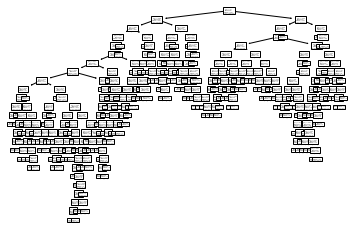

In [8]:
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


# Split the data into a training and test set.
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(trainX, trainY)
# Print the accuracy from the testing data.
print("Depth = 3, Accuracy = ",accuracy_score(clf.predict(testX), testY))

#the grid of parameters to search over
max_depth = [3,4,5,6,7]
for C in max_depth:
    clf = DecisionTreeClassifier(max_depth=C)
    # Fit the model on the trainng data.
    clf.fit(trainX, trainY)
    # Print the accuracy from the testing data.
    print("Depth ={0}, Accuracy = {1}".format(C, accuracy_score(clf.predict(testX), testY)))


#the grid of parameters to search over
max_leaf_nodes = [10, 25, 50, 100, 200]
for C in max_leaf_nodes:
    clf = DecisionTreeClassifier(max_leaf_nodes=C)
    # Fit the model on the trainng data.
    clf.fit(trainX, trainY)
    # Print the accuracy from the testing data.
    print("max_leaf_nodes ={0}, Accuracy = {1}".format(C, accuracy_score(clf.predict(testX), testY)))

## Tree visualization 
tree.plot_tree(clf) 


In [9]:
# It is clear that created_time is split into many intervals.. , so 
# We also eliminate Creation time from the features..

trainX = np.hstack([ csTrainCategorical,mailingTrainCategorical,marketingTrainCategorical] )
testX = np.hstack([ csTestCategorical,mailingTestCategorical,marketingTestCategorical])
print("trainX.shape = ", trainX.shape)
print("testX.shape = ", testX.shape)


trainX.shape =  (9000, 7)
testX.shape =  (3000, 7)


Depth =3, Accuracy = 0.861
Depth =4, Accuracy = 0.861
Depth =5, Accuracy = 0.861
Depth =6, Accuracy = 0.861
Depth =7, Accuracy = 0.861
max_leaf_nodes =10, Accuracy = 0.861
max_leaf_nodes =25, Accuracy = 0.861
max_leaf_nodes =50, Accuracy = 0.861
max_leaf_nodes =100, Accuracy = 0.861
max_leaf_nodes =200, Accuracy = 0.861
Depth =3, Accuracy = 0.861


[Text(167.4, 190.26, 'X[5] <= 0.5\ngini = 0.229\nsamples = 9000\nvalue = [7815, 1185]'),
 Text(83.7, 135.9, 'X[3] <= 0.5\ngini = 0.222\nsamples = 6750\nvalue = [5892, 858]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.22\nsamples = 5590\nvalue = [4887, 703]'),
 Text(20.925, 27.180000000000007, 'gini = 0.216\nsamples = 3232\nvalue = [2833, 399]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.225\nsamples = 2358\nvalue = [2054, 304]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 0.5\ngini = 0.232\nsamples = 1160\nvalue = [1005, 155]'),
 Text(104.625, 27.180000000000007, 'gini = 0.237\nsamples = 1101\nvalue = [950, 151]'),
 Text(146.475, 27.180000000000007, 'gini = 0.126\nsamples = 59\nvalue = [55, 4]'),
 Text(251.10000000000002, 135.9, 'X[3] <= 0.5\ngini = 0.248\nsamples = 2250\nvalue = [1923, 327]'),
 Text(209.25, 81.53999999999999, 'X[6] <= 0.5\ngini = 0.238\nsamples = 1858\nvalue = [1601, 257]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.

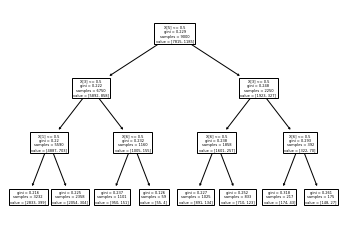

In [10]:

#the grid of parameters to search over
max_dep = [3,4,5,6,7]
for C in max_dep:
    clf = DecisionTreeClassifier(max_depth=C)
    # Fit the model on the trainng data.
    clf.fit(trainX, trainY)
    # Print the accuracy from the testing data.
    print("Depth ={0}, Accuracy = {1}".format(C, accuracy_score(clf.predict(testX), testY)))
    ## Tree visualization 
    tree.plot_tree(clf) 

#the grid of parameters to search over
max_nodes = [10, 25, 50, 100, 200]
for C in max_nodes:
    clf = DecisionTreeClassifier(max_leaf_nodes=C)
    # Fit the model on the trainng data.
    clf.fit(trainX, trainY)
    # Print the accuracy from the testing data.
    print("max_leaf_nodes ={0}, Accuracy = {1}".format(C, accuracy_score(clf.predict(testX), testY)))
    ## Tree visualization 
    tree.plot_tree(clf) 

clf = DecisionTreeClassifier(max_depth=3)
# Fit the model on the trainng data.
clf.fit(trainX, trainY)
# Print the accuracy from the testing data.
print("Depth ={0}, Accuracy = {1}".format(3, accuracy_score(clf.predict(testX), testY)))
## Tree visualization 
tree.plot_tree(clf) 


In [11]:
'''
# We could try logistic regression as well


# import the necessary packages
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.utils import to_categorical
'''

'\n# We could try logistic regression as well\n\n\n# import the necessary packages\nfrom tensorflow.keras.models import Sequential\n#from tensorflow.keras.layers import BatchNormalization\nfrom tensorflow.keras.layers import Activation\nfrom tensorflow.keras.layers import Dense\n#from tensorflow.keras.layers import Flatten\nfrom tensorflow.keras.layers import Input\nfrom tensorflow.keras.models import Model\nfrom keras.utils import to_categorical\n'

In [12]:
'''
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(7,)))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(1, activation='relu'))
network.compile(optimizer='adagrad',
#network.compile(optimizer='adagrad',
#loss='mse',
loss='binary_crossentropy',
metrics=['accuracy'])
trainY = to_categorical(trainY)
testY = to_categorical(testY)
print("222 - trainY = ", trainY)
print("222 - testY = ", testY)
network.fit(trainX, trainY, epochs=40, batch_size=16)
results = network.evaluate(testX, testY)
#network.predict(testX)
#from keras.utils import to_categorical
##train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

preds = network.predict(testX)
print("preds = ", preds)
print("preds.flatten() = ", preds.flatten())

# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
print("diff = ", diff)
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))
'''

'\nnetwork = models.Sequential()\nnetwork.add(layers.Dense(16, activation=\'relu\', input_shape=(7,)))\nnetwork.add(layers.Dense(8, activation=\'relu\'))\nnetwork.add(layers.Dense(1, activation=\'relu\'))\nnetwork.compile(optimizer=\'adagrad\',\n#network.compile(optimizer=\'adagrad\',\n#loss=\'mse\',\nloss=\'binary_crossentropy\',\nmetrics=[\'accuracy\'])\ntrainY = to_categorical(trainY)\ntestY = to_categorical(testY)\nprint("222 - trainY = ", trainY)\nprint("222 - testY = ", testY)\nnetwork.fit(trainX, trainY, epochs=40, batch_size=16)\nresults = network.evaluate(testX, testY)\n#network.predict(testX)\n#from keras.utils import to_categorical\n##train_labels = to_categorical(train_labels)\n#test_labels = to_categorical(test_labels)\n\npreds = network.predict(testX)\nprint("preds = ", preds)\nprint("preds.flatten() = ", preds.flatten())\n\n# compute the difference between the *predicted* house prices and the\n# *actual* house prices, then compute the percentage difference and\n# the abs

In [13]:
import sklearn
sklearn.__version__

'0.23.1'